In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['y'])

# # 学習データとテストデータに分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.5)

X_train = X
y_train = y

#RandamForestの学習済みモデルを用意する。
clf = RandomForestRegressor().fit(X_train, y_train)

y_train.head()  # 1番目のデータの予測結果はsetosa

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [2]:
shap.initjs()

# TreeExplainer

In [3]:
#SHAPのExplainerを用意する。ランダムフォレストなのでTreeExplainerを使う。
explainer = shap.TreeExplainer(clf)
 

## summary_plot

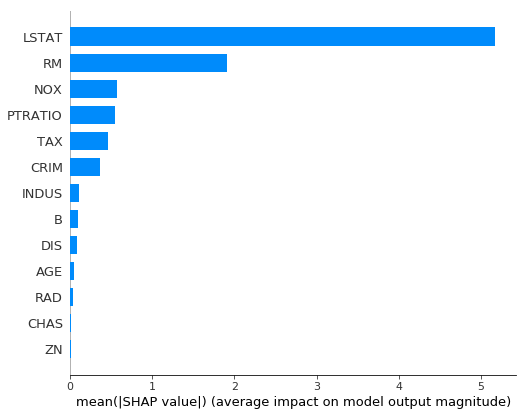

In [4]:
shap_values = explainer.shap_values(X_train.loc[[0]])
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

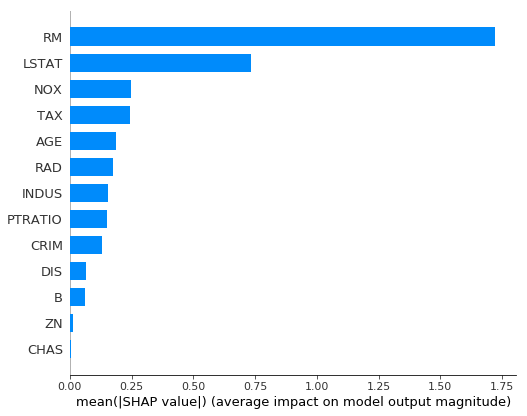

In [5]:
shap_values = explainer.shap_values(X_train.loc[[1]])
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

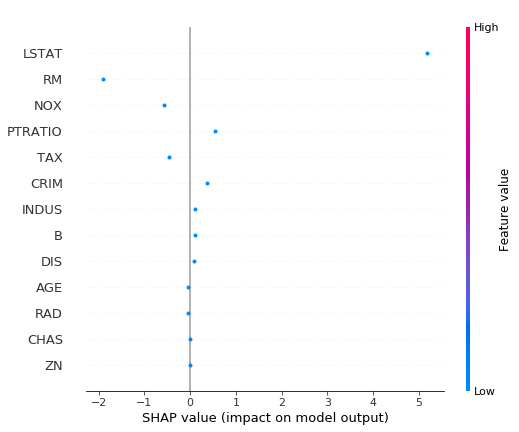

In [6]:
shap_values = explainer.shap_values(X_train.loc[[0]])
shap.summary_plot(shap_values, X_train.loc[[0]])

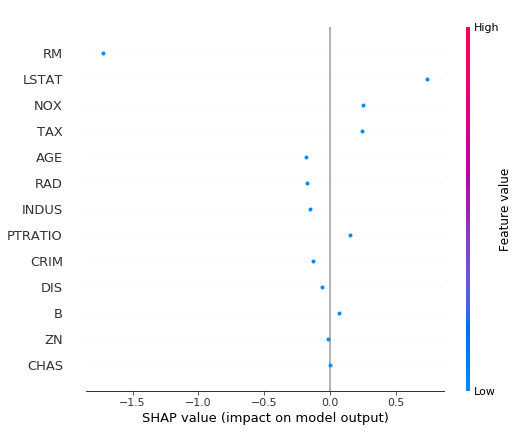

In [7]:
shap_values = explainer.shap_values(X_train.loc[[1]])
shap.summary_plot(shap_values, X_train.loc[[1]])

## force_plot

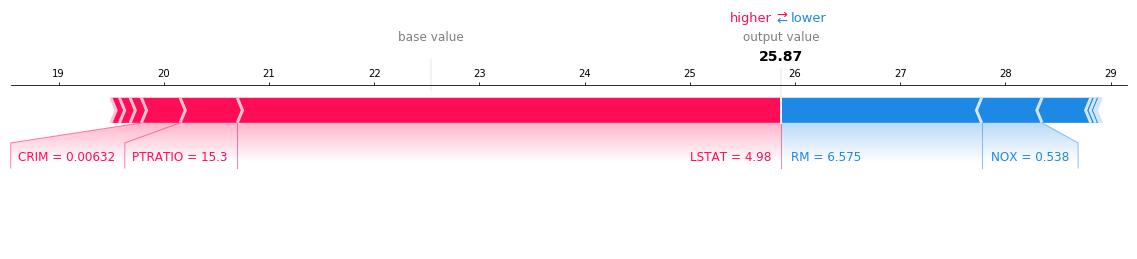

In [8]:
shap_values = explainer.shap_values(X_train.loc[[0]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[0]], 
                matplotlib=True,
                )

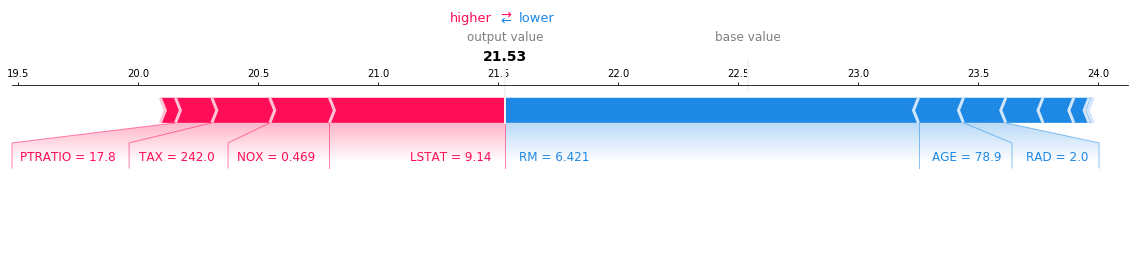

In [9]:
shap_values = explainer.shap_values(X_train.loc[[1]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[1]], 
                matplotlib=True,
                )

# KernelExplainer

In [10]:
#SHAPのExplainerを用意する。SVCなのでKernelExplainerを使う。
explainer = shap.KernelExplainer(clf.predict, X_train)


Using 506 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


## summary_plot

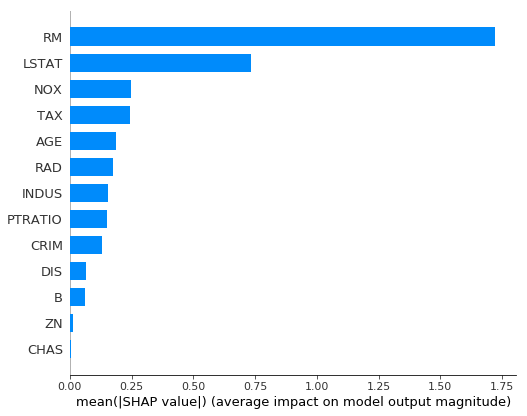

In [11]:
shap.summary_plot(shap_values, features=X_train, plot_type="bar")

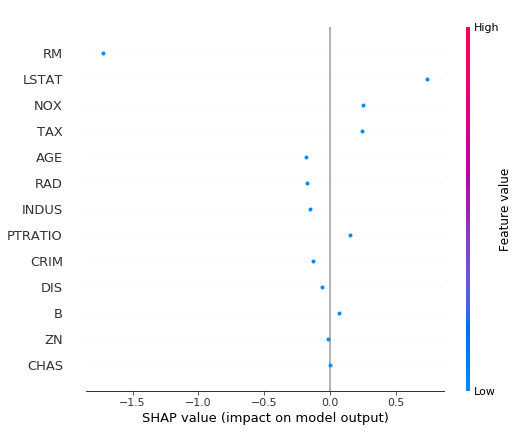

In [12]:
shap.summary_plot(shap_values, X_train.loc[[0]])

## force_plot

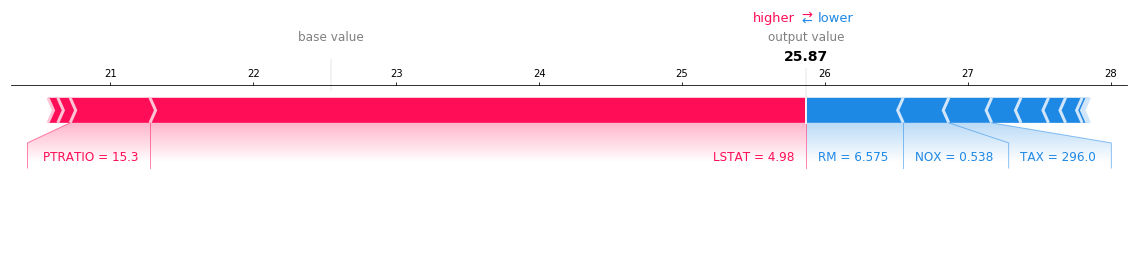

In [13]:
shap_values = explainer.shap_values(X_train.loc[[0]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[0]], 
                matplotlib=True,
                )

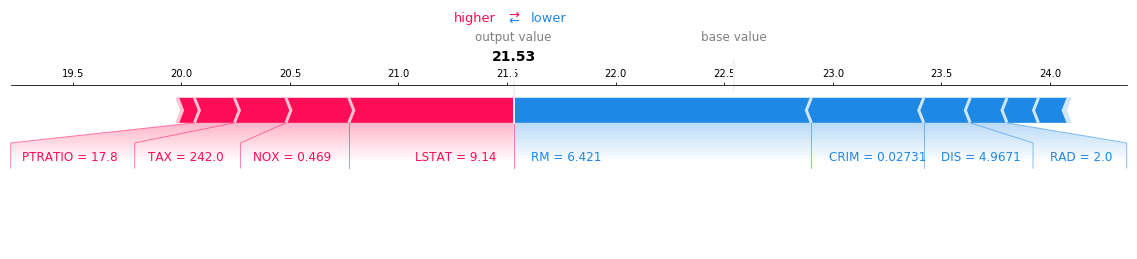

In [14]:
shap_values = explainer.shap_values(X_train.loc[[1]])
#予測に使ったデータに対して出力とその要因について可視化する。
shap.force_plot(explainer.expected_value, 
                shap_values, 
                X_train.loc[[1]], 
                matplotlib=True,
                )